In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config.selectionconfig import cleansetting as cleancfg
from config.selectionconfig import plotsetting as pltcfg

In [3]:
from utils.filesysutil import *

In [4]:
import os
import awkward_pandas as akpd

In [5]:
import pandas as pd

In [6]:
import awkward as ak

In [7]:
import uproot

## Test DataPlotter & ObjPlotter

In [27]:
from utils.rootutil import DataLoader

In [28]:
dl = DataLoader(cleancfg, False)

In [29]:
from analysis.plotutility import DataPlotter, ObjectPlotter

In [30]:
dp = DataPlotter(cleancfg, pltcfg)

In [31]:
dp.labels

['DYJets', 'SingleH', 'WW', 'WWW', 'WZ', 'ZH', 'ggF']

In [37]:
dp.wgt[-1] = dp.wgt[-1] * 100

In [39]:
sum(dp.wgt[-1])

1828.5796166094951

In [47]:
tau_dict = {"pt": 
                {'objindx': 0,
                 'bins': 135, 
                'range': [0,300],
                'xlabel': r'Leading $\tau$ $P_t$',
                'save': True,
                'alpha': 0.95,
                'color':['darkviolet', 'green', 'darkblue', 'darkorange', 'gray', 'red'],
                'stack': False}
           }

/uscms/home/joyzhou/work/hhbbtautau/src/analysis/plotutility.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


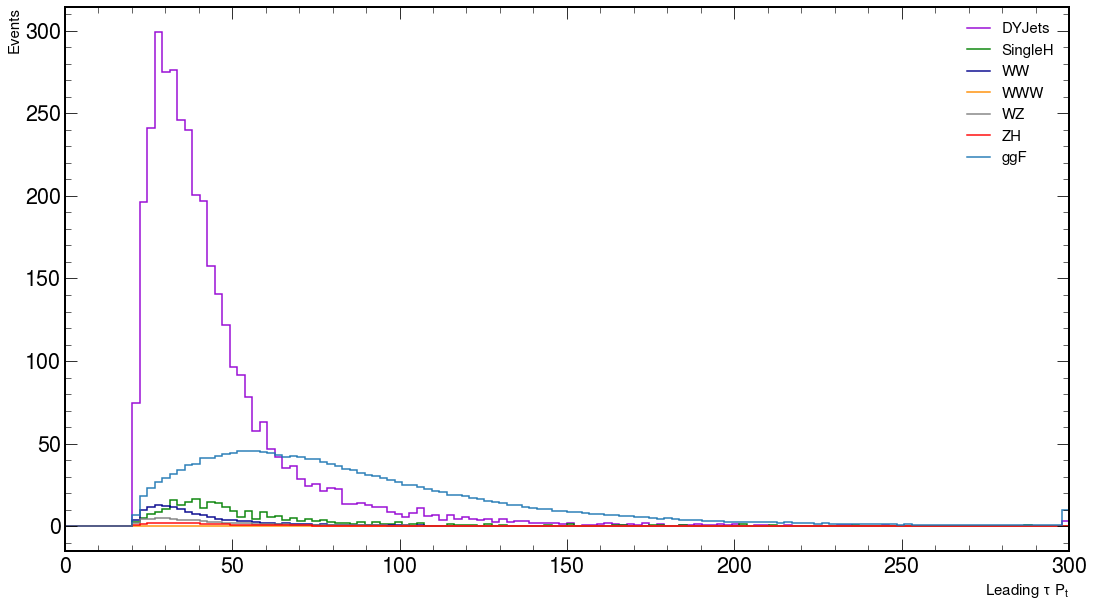

In [48]:
dp.plotobj('Tau', tau_dict)

In [41]:
taus = dp.getobj('Tau')

In [166]:
tauplotter = ObjectPlotter('Tau', pltcfg['Tau'], wgtlist, lablist, objlist)

In [167]:
outputdir = pjoin(cleancfg.LOCALOUTPUT, 'plots')

In [191]:
histlist, bins = tauplotter.histobj('pt', 0, bins_no=135, range=(0,200))

/uscms/home/joyzhou/work/hhbbtautau/src/analysis/plotutility.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.savefig(save_name, dpi=300)


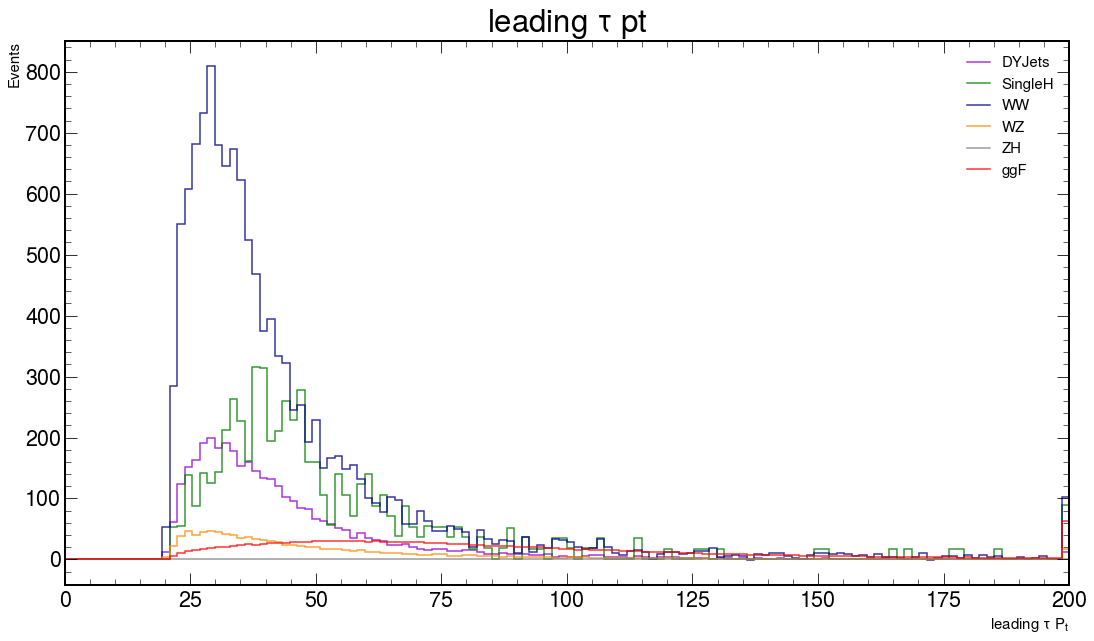

In [192]:
ObjectPlotter.plot_var(histlist, bins, legend=lablist, 
                       xlabel=r'subleading $\tau$ $P_t$',
                       range=(0,200), save=True, 
                       title=r'subleading $\tau$ pt',
                       save_name=pjoin(outputdir, 'subleadingtaupt.png'),
                       color = ['darkviolet', 'green', 'darkblue', 'darkorange', 'gray', 'red'],
                       alpha = 0.8,
                       stack=False)

/uscms/home/joyzhou/work/hhbbtautau/src/analysis/plotutility.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


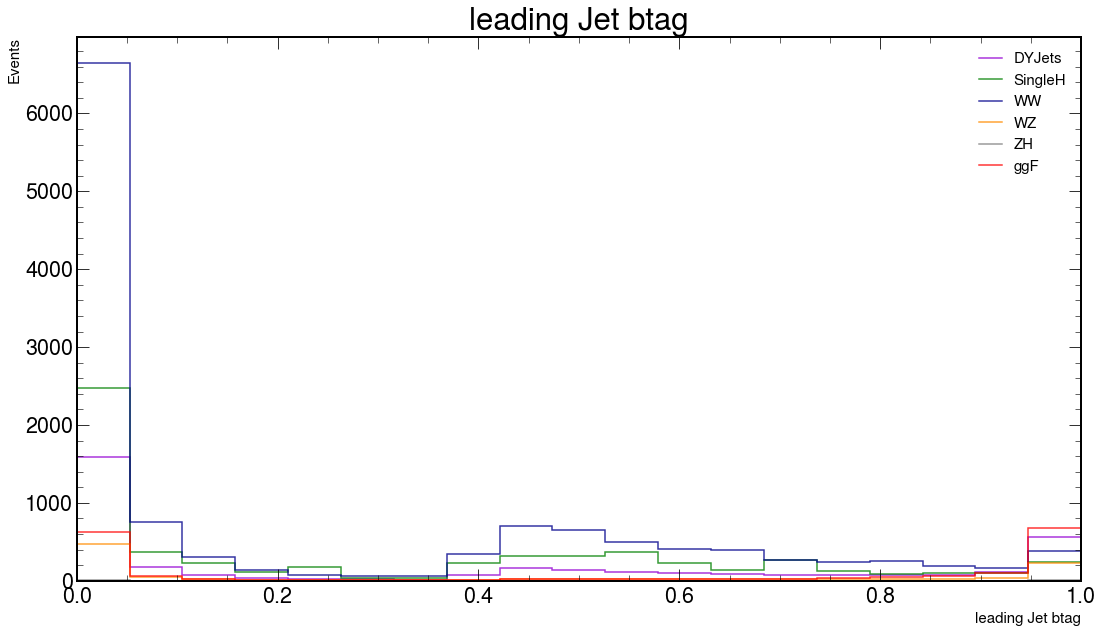

In [204]:
taus = dp.getobj('Jet')
objlist, wgtlist, lablist = DataPlotter.concatevts(labels, taus, wgt)
tauplotter = ObjectPlotter('Jet', pltcfg['Tau'], wgtlist, lablist, objlist)
outputdir = pjoin(cleancfg.LOCALOUTPUT, 'plots')
histlist, bins = tauplotter.histobj('btag', 0, bins_no=20, range=(0,1))
ObjectPlotter.plot_var(histlist, bins, legend=lablist, 
                       xlabel=r'leading Jet btag',
                       range=(0,1), save=True, 
                       title=r'leading Jet btag',
                       save_name=pjoin(outputdir, 'leadingjetbtag.png'),
                       color = ['darkviolet', 'green', 'darkblue', 'darkorange', 'gray', 'red'],
                       alpha = 0.8,
                       stack=False)

In [196]:
histlist, bins = tauplotter.histobj('btag', 0, bins_no=20, range=(0,1))
ObjectPlotter.plot_var(histlist, bins, legend=lablist, 
                       xlabel=r'btag score',
                       range=(0,1), save=True, 
                       title=r'leading Jet btag',
                       save_name=pjoin(outputdir, 'leadingjetbtag.png'),
                       color = ['darkviolet', 'green', 'darkblue', 'darkorange', 'gray', 'red'],
                       alpha = 0.8,
                       stack=False)

FieldNotFoundError: no field 'btag' in record with 11 fields

This error occurred while attempting to slice

    <Array [{n: 2, pt: [...], ...}, ..., {...}] type='12216 * {n: int32, pt...'>

with

    'btag'

## Test Dataloader

In [19]:
from utils.rootutil import DataLoader

In [20]:
dl = DataLoader(cleancfg)

In [32]:
rawdf, wgtdf = dl.get_totcf()

DYJets
ZH
ggF
WW
WZ
SingleH


## Load one example process and plot

In [13]:
filelist = ['DYJetsToLL_M-50_limited.root', 'GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_limited.root']

In [14]:
filepath = [pjoin(pltcfg.OUTPUTDIR, 'objlimited', file) for file in filelist]
filepath

['/uscms/home/joyzhou/nobackup/hadded/objlimited/DYJetsToLL_M-50_limited.root',
 '/uscms/home/joyzhou/nobackup/hadded/objlimited/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_limited.root']

In [15]:
df = load_fields(filepath[0], tree_name='Tau')

In [45]:
df['process']='DYJets'

In [16]:
from analysis.plotutility import DataPlotter

In [35]:
df['pt']

<Array [[26.3, 25.5], ..., [38.3, 20.8, 18]] type='12216 * var * float32'>

In [17]:
dp = DataPlotter(pltcfg)

In [18]:
tau_pt = DataPlotter.sortobj(df, 'pt', 'pt')

In [28]:
weight = load_fields(filepath[0], tree_name='extra')['Generator_weight'] * dp.wgt_dict['DYJets']['DYJetsToLL_M-50']

In [29]:
weight.to_numpy()

array([5.853777e-05, 5.853777e-05, 5.853777e-05, ..., 5.853777e-05,
       5.853777e-05, 5.853777e-05], dtype=float32)

In [38]:
leading_pt, bins = DataPlotter.deal_overflow(tau_pt[:,0], bins=135, range=(0,300), weights=weight)

/uscms/home/joyzhou/work/hhbbtautau/src/analysis/plotutility.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # style a dataframe table


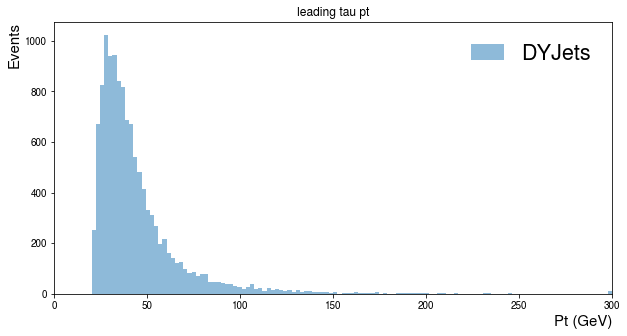

In [42]:
DataPlotter.plot_var(leading_pt, bins, title='leading tau pt', legend='DYJets', xlabel='Pt (GeV)', range=(0,300), save=False)

In [40]:
leading_pt, bins = DataPlotter.deal_overflow(tau_pt[:,0], bins=135, range=(0,300), weights=None)

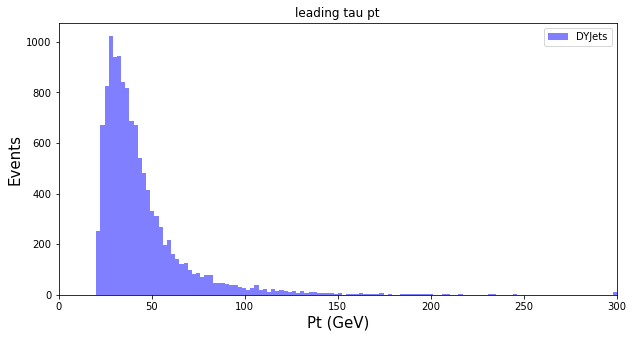

In [41]:
DataPlotter.plot_var(leading_pt, bins, title='leading tau pt', legend='DYJets', xlabel='Pt (GeV)', range=(0,300), save=False)

## Load signal process and inspect

In [9]:
# Load one signal output
fi = '/uscms/home/joyzhou/nobackup/output/ggF/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_249-part0.root'

In [15]:
# check events to be correct type
checkevents(df)

True

In [16]:
tau = fourvector(df, 'Tau')

In [23]:
lead_tau = tau[:,0]

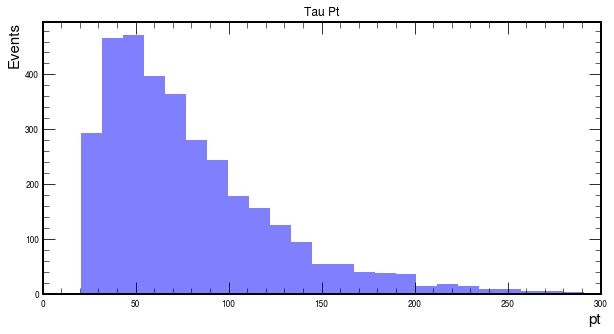

In [34]:
DataPlotter.plot_var(lead_tau.pt, 'Tau Pt', 'pt', 50, (0,300))

In [25]:
lead_tau.pt

<Array [52, 111, 46, 65.5, ..., 98.3, 62.8, 215, 23.6] type='3387 * float64'>

In [14]:
# sort mask
sortmask = DataPlotter.sortmask(df['Tau_pt'])

In [23]:
pt_awk = DataLoader.arr_handler(df['Tau_pt'])

In [46]:
gen_wgt = DataLoader.arr_handler(df['Generator_weight'])

AttributeError: ak accessor called on incompatible data

## Unpickle a dataframe and inspect

In [7]:
with open(pjoin(vis.outdir, 'WZZ.pkl'), 'rb') as f:
    testdf = pickle.load(f)

In [8]:
testdf.columns

Index(['Tau_chargedIso', 'Tau_dxy', 'Tau_dz', 'Tau_eta', 'Tau_leadTkDeltaEta',
       'Tau_leadTkDeltaPhi', 'Tau_leadTkPtOverTauPt', 'Tau_mass',
       'Tau_neutralIso', 'Tau_phi',
       ...
       'FatJet_muonIdx3SJ', 'FatJet_nConstituents', 'FatJet_genJetAK8Idx',
       'FatJet_hadronFlavour', 'FatJet_nBHadrons', 'FatJet_nCHadrons',
       'Generator_weight', 'nLHEReweightingWeight', 'LHEReweightingWeight',
       'dataset'],
      dtype='object', length=140)

In [19]:
type(testdf)

pandas.core.frame.DataFrame

In [17]:
val = isinstance(testdf['Tau_pt'], pd.core.series.Series)

In [21]:
type(testdf['Tau_pt'].ak.array)

awkward.highlevel.Array

In [18]:
val

True

## If weights and df saved ....

In [14]:
raw_df, wgt_df = vis.load_allcf()

In [20]:
raw_df

,DYJetsToLL_M-10to50,DYJetsToLL_M-50,ZH_HToBB_ZToLL_M-125,ZH_HToBB_ZToQQ_M-125,ttHto2B_M-125,VBFHToTauTau_M125,GluGluHToTauTau_M-125
initial,22445405,92312235,2062940,4092774,4107465,298000,291000
ElectronSelection,22314144,68892058,1236115,3577235,2431611,221865,242886
MuonSelection,21925141,47130535,609499,3373217,1683102,187064,213728
TauSelection,277,72801,11019,9159,26490,9067,5214


In [15]:
wgt_df

,DYJetsToLL_M-10to50,DYJetsToLL_M-50,ZH_HToBB_ZToLL_M-125,ZH_HToBB_ZToQQ_M-125,ttHto2B_M-125,VBFHToTauTau_M125,GluGluHToTauTau_M-125
initial,654524.197717,301299.553562,15.371238,14.371148,11.154468,50.013422,50.001625
ElectronSelection,650696.532290,224858.019301,9.210456,12.560912,6.603423,37.235664,41.734346
MuonSelection,639352.924256,153830.195473,4.541458,11.844534,4.570729,31.395003,36.724218
TauSelection,8.077520,237.616485,0.082104,0.032160,0.071938,1.521717,0.895905


In [18]:
eff_df = vis.efficiency(wgt_df, overall=False, append=False, save=False)

In [19]:
eff_df

,DYJetsToLL_M-10to50_eff,DYJetsToLL_M-50_eff,ZH_HToBB_ZToLL_M-125_eff,ZH_HToBB_ZToQQ_M-125_eff,ttHto2B_M-125_eff,VBFHToTauTau_M125_eff,GluGluHToTauTau_M-125_eff
initial,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
ElectronSelection,99.415199,74.629390,59.920066,87.403678,59.199798,74.451342,83.465979
MuonSelection,98.256698,68.412146,49.307629,94.296768,69.217568,84.314335,87.995191
TauSelection,0.001263,0.154467,1.807878,0.271521,1.573880,4.847004,2.439549


## If compute from beginning 

In [23]:
vis.grepweights(output=True, from_raw=True)

In [24]:
vis.indir

'/uscms/home/joyzhou/nobackup/output'

In [8]:
# test combine_cf()
dirname = pjoin(vis.indir, 'DYJets')
raw_cutflow = vis.combine_cf(dirname, 'DYJetsToLL_M-10to50', output=True)
raw_cutflow

,DYJetsToLL_M-10to50
initial,22445405
ElectronSelection,22314144
MuonSelection,21925141
TauSelection,277


In [25]:
# test compute_allcf()
raw_df, wgt_df = vis.compute_allcf()

In [26]:
raw_df

,ZH_HToBB_ZToLL_M-125,ZH_HToBB_ZToQQ_M-125,ttHto2B_M-125,VBFHToTauTau_M125,GluGluHToTauTau_M-125,GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00
initial,2062940,4092774,4107465,298000,291000,3064500
ElectronSelection,1236115,3577235,2431611,221865,242886,1742025
MuonSelection,609499,3373217,1683102,187064,213728,1196733
TauSelection,11019,9159,26490,9067,5214,566366


In [27]:
wgt_df

,ZH_HToBB_ZToLL_M-125,ZH_HToBB_ZToQQ_M-125,ttHto2B_M-125,VBFHToTauTau_M125,GluGluHToTauTau_M-125,GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00
initial,1.313743,8.566681,6.395000,209.000000,1583.000000,1.479704
ElectronSelection,0.787196,7.487595,3.785827,155.603305,1321.266454,0.841142
MuonSelection,0.388148,7.060560,2.620457,131.195893,1162.650942,0.577846
TauSelection,0.007017,0.019171,0.041243,6.359070,28.363443,0.273472


In [28]:
eff_df = vis.efficiency(raw_df, overall=False, append=False, save=False)
eff_df

,ZH_HToBB_ZToLL_M-125_eff,ZH_HToBB_ZToQQ_M-125_eff,ttHto2B_M-125_eff,VBFHToTauTau_M125_eff,GluGluHToTauTau_M-125_eff,GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_eff
initial,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
ElectronSelection,59.920066,87.403678,59.199798,74.451342,83.465979,56.845326
MuonSelection,49.307629,94.296768,69.217568,84.314335,87.995191,68.697809
TauSelection,1.807878,0.271521,1.573880,4.847004,2.439549,47.326012


In [6]:
# test combine_roots()
events = vis.combine_roots(save=True)

## Inspect one example root output file after preselection

In [5]:
finame = "/uscms/home/joyzhou/nobackup/output/SingleH/ttHto2B_M-125_tauhtauh_0-part0.root"
events = uproot.open(f'{finame}:tree')

In [7]:
my_list = events.keys()
substring = 'weight'
filtered_keys = [item for item in my_list if substring in item]

In [8]:
filtered_keys

['Generator_weight', 'nLHEReweightingWeight', 'LHEReweightingWeight']

In [56]:
sample_ak= events.arrays(['Tau_pt', 'Tau_eta'])

In [63]:
type(sample_ak)

awkward.highlevel.Array

In [61]:
sample_ak['process'] = 'ttH'

In [62]:
sample_ak

<Array [{Tau_pt: [...], ...}, ..., {...}] type='797 * {Tau_pt: var * float3...'>

In [59]:
sample_df = events.arrays(['Tau_pt', 'Tau_eta'], library='pd')

In [7]:
sample_df

,Tau_pt,Tau_eta
0,"[71.8727798461914, 64.95415496826172]","[0.244415283203125, -0.148651123046875]"
1,"[176.418701171875, 70.15322875976562, 27.03549...","[0.632080078125, -0.7083740234375, -0.21557617..."
2,"[101.26901245117188, 72.00780487060547, 28.329...","[1.045166015625, 0.4097900390625, 1.4943847656..."
3,"[68.88240814208984, 50.81139373779297, 39.4530...","[0.9951171875, 0.881103515625, 1.73193359375]"
4,"[82.45059967041016, 47.47563934326172]","[-1.1298828125, -0.9632568359375]"
...,...,...
792,"[68.6008071899414, 40.46160888671875, 27.69552...","[-1.956787109375, 0.242156982421875, -0.259033..."
793,"[44.68653869628906, 41.38773727416992, 24.4122...","[1.0146484375, 1.919677734375, 1.092041015625,..."
794,"[332.97515869140625, 52.50996398925781]","[-0.159820556640625, -0.0513458251953125]"
795,"[56.74041748046875, 45.25996017456055]","[-0.935302734375, -1.15283203125]"


In [66]:
sample_df['Tau_pt'].ak.array

<Array [[71.9, 65], [...], ..., [78.9, 40.9, 21.9]] type='797 * var * float32'>

In [10]:
type(sample_df['Tau_pt'])

pandas.core.series.Series

In [23]:
type(sample_df['Tau_pt'][0])

numpy.float32